In [4]:
%matplotlib inline
%config InlineBackend.figure_format = "svg"

Pressure-Entropy Test
======

This test considers a non-uniformly spaced set of particles, with a corresponding jump in energy for a supposedly 'constant' pressure -- note that this is not actually the case as the density around the central region at $x=25$ is not truly constant, once appopriately smoothed.

In [25]:
from sphtests import PressureEntropyData
import numpy as np
import matplotlib.pyplot as plt

First, we'll set up the positions in a similar way:

In [37]:
diff_right = 0.0

positions_left = [x/10. for x in range(70, 250)]
positions_right = list(range(26, 70))
positions = positions_left + positions_right

Now we must consider the energies. This is fairly simple due to the way that we set up the positions:

In [38]:
energies_left = [1.0] * len(positions_left)
energies_right = [10.0] * len(positions_right)
energies = energies_left + energies_right

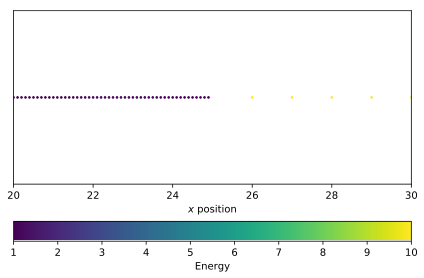

In [39]:
plt.scatter(positions, [0]*len(positions), c=energies, s=3)
plt.xlim(20, 30)
plt.xlabel("$x$ position")
plt.colorbar(orientation="horizontal", label="Energy")
plt.gca().axes.yaxis.set_visible(False)
plt.tight_layout()

Looks good! Now we can pass these to our SPH stuff:

(note that $\eta = 5$ is equivalent to 20 neighbors in 1D).

In [40]:
data = PressureEntropyData(positions, energies, eta=25)

Grabbing the GadgetData object
Calculating smoothing lengths
Calculating densities
Calculating pressures
Starting Pressure-Entropy calculation
Minimising to find values of A
Difference: 3.5234749250049546
Difference: 0.24040717681481036
Difference: 0.015850439419960144
Difference: 0.0012213654608819596
Difference: 0.00012140602182163229
Difference: 1.4420214841451284e-05
Difference: 1.6703145588187196e-06
Difference: 1.9868547126988823e-07
Difference: 2.3985455926966992e-08
Calculating smoothed pressures
Calculating smoothed densities


Text(0.5,1,'Density Distribution')

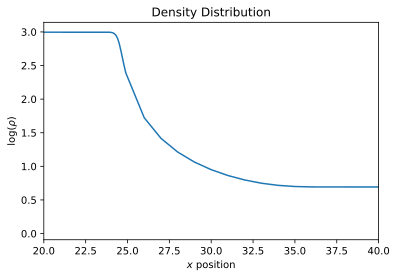

In [41]:
plt.plot(data.gadget.positions, np.log(data.gadget.densities))
plt.xlim(20, 40)
plt.ylabel(r"log($\rho$)")
plt.xlabel("$x$ position")
plt.title("Density Distribution")

Text(0.5,1,'GADGET Pressure Distribution')

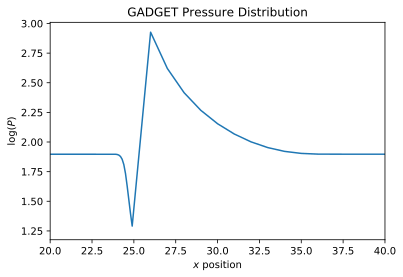

In [42]:
plt.plot(data.gadget.positions, np.log(data.gadget.pressures))
plt.xlim(20, 40)
plt.xlabel("$x$ position")
plt.ylabel("log($P$)")
plt.title("GADGET Pressure Distribution")

Text(0.5,1,'Internal Energy Distribution')

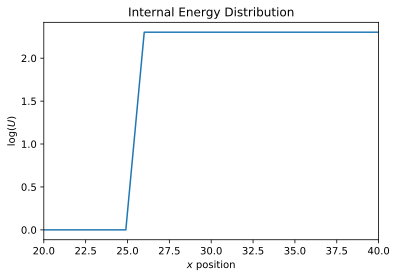

In [43]:
plt.plot(data.gadget.positions, np.log(data.gadget.energies))
plt.xlim(20, 40)
plt.xlabel("$x$ position")
plt.ylabel("log($U$)")
plt.title("Internal Energy Distribution")

Text(0.5,1,'Smoothing Length')

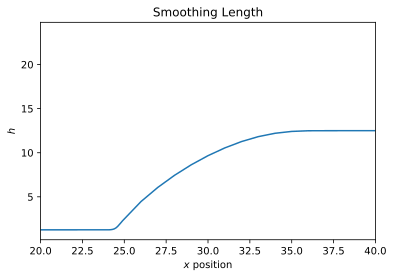

In [44]:
plt.plot(data.gadget.positions, data.gadget.smoothing_lengths)
plt.xlim(20, 40)
plt.xlabel("$x$ position")
plt.ylabel("$h$")
plt.title("Smoothing Length")

Text(0.5,1,'Adiabat')

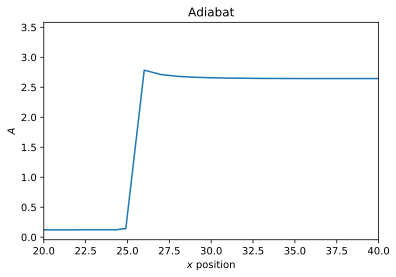

In [45]:
plt.plot(data.gadget.positions, data.adiabats)
plt.xlim(20, 40)
plt.xlabel("$x$ position")
plt.ylabel("$A$")
plt.title("Adiabat")

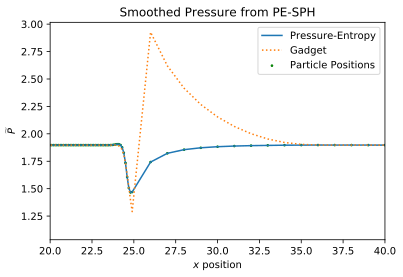

In [46]:
plt.scatter(data.gadget.positions, np.log(data.smoothed_pressures), s=3, c="green", label="Particle Positions")
plt.plot(data.gadget.positions, np.log(data.smoothed_pressures), label="Pressure-Entropy")
plt.plot(data.gadget.positions, np.log(data.gadget.pressures), ls='dotted', label="Gadget")
plt.xlim(20, 40)
plt.xlabel("$x$ position")
plt.ylabel("$\widetilde{P}$")
plt.title("Smoothed Pressure from PE-SPH")
plt.legend()

In [49]:
difference = [x - y for x, y in zip(data.gadget.pressures, pressures)]

Text(0.5,1,'Pressure difference, Unsmoothed PE vs GADGET')

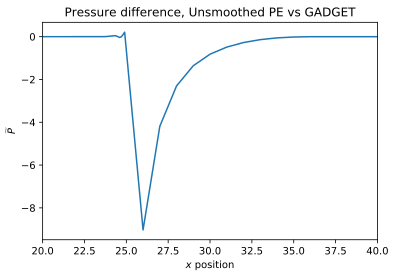

In [50]:
plt.plot(data.gadget.positions, difference)
plt.xlim(20, 40)
plt.xlabel("$x$ position")
plt.ylabel("$\widetilde{P}$")
plt.title("Pressure difference, Unsmoothed PE vs GADGET")